In [1]:
import subprocess
!wget --no-check-certificate \
    "https://storage.googleapis.com/datsets/model2/patcheswithdiseased.zip"\
    -O "/tmp/patchesDis.zip"

zipFile = '/tmp/patchesDis.zip'
# zip_ref.extractall('/tmp')
destinationDirectory='/tmp'
subprocess.Popen(["7z", "e", f"{zipFile}", f"-o{destinationDirectory}", "-y"])
# zip_ref.close()

--2020-04-18 08:47:24--  https://storage.googleapis.com/datsets/model2/patcheswithdiseased.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298234490 (284M) [application/x-zip-compressed]
Saving to: ‘/tmp/patchesDis.zip’

/tmp/patchesDis.zip 100%[===================>] 284.42M  96.0MB/s    in 3.0s    

2020-04-18 08:47:27 (96.0 MB/s) - ‘/tmp/patchesDis.zip’ saved [298234490/298234490]



In [0]:
import os
import zipfile
import random
import numpy as np

In [0]:
chaseTrain = []
chaseTrainOutput = []

In [0]:
chaseTrain = np.load('/tmp/chasetrain.npy')
# chaseTrain = np.load('D:/drive-Mission retina-dataset-model2data/chasetrain.npy')

In [0]:
chaseTrainOutput = np.load('/tmp/chaseoutputtrain.npy')

In [0]:
stareTrain = []
stareTrainOutput = []

In [0]:
stareTrain = np.load('/tmp/staretrain.npy')
# stareTrainOutput = np.load('/tmp/stareoutputtrain.npy')

In [0]:
stareTrainOutput = np.load('/tmp/stareoutputtrain.npy')

In [0]:
driveTrain = []
driveTrainOutput = []

In [0]:
driveTrain = np.load('/tmp/drivetrain.npy')

In [0]:
driveTrainOutput = np.load('/tmp/driveoutputtrain.npy')

In [0]:
import random

In [17]:
indexes = random.sample(range(0, len(chaseTrain)-1), k=500000)
chase = []
# a = []
for i in indexes:
  # a.append(index)
  array = chaseTrain[i]
  chase.append(array)
# b = list(set(a))
indexesChase = indexes
print(np.array(chase).shape)

(500000, 11, 11, 3)


In [18]:
indexes = random.sample(range(0, len(driveTrain)-1), k=500000)
drive = []
# a = []
for i in indexes:
  # a.append(index)
  array = driveTrain[i]
  drive.append(array)
# b = list(set(a))
indexesDrive = indexes
print(np.array(drive).shape)

(500000, 11, 11, 3)


In [19]:
indexes = random.sample(range(0, len(stareTrain)-1), k=500000)
stare = []
# a = []
for i in indexes:
  # a.append(index)
  array = stareTrain[i]
  stare.append(array)
# b = list(set(a))
indexesStare = indexes
print(np.array(stare).shape)
print(max(indexesStare), len(stareTrain))
print(max(indexesChase), len(chaseTrain))
print(max(indexesDrive), len(driveTrain))

(500000, 11, 11, 3)
533518 533520
575998 576000
552823 552825


In [0]:
temp = np.concatenate((np.array(drive), np.array(stare)), axis = 0)
training_array = np.concatenate((temp, np.array(chase)), axis = 0)

In [21]:
indexes = indexesChase
chaseOutput = []
# a = []
for i in indexes:
  # a.append(index)
  array = chaseTrainOutput[i]
  chaseOutput.append(array)
# b = list(set(a))
print(np.array(chaseOutput).shape)

(500000,)


In [22]:
indexes = indexesStare
StareOutput = []
# a = []
for i in indexes:
  # a.append(index)
  array = stareTrainOutput[i]
  StareOutput.append(array)
# b = list(set(a))
print(np.array(StareOutput).shape)

(500000,)


In [23]:
indexes = indexesDrive
DriveOutput = []
# a = []
for i in indexes:
  # a.append(index)
  array = driveTrainOutput[i]
  DriveOutput.append(array)
# b = list(set(a))
print(np.array(DriveOutput).shape)

(500000,)


In [0]:
temp = []
temp = np.concatenate((np.array(DriveOutput), np.array(StareOutput)), axis = 0)
training_array_output = np.concatenate((temp, np.array(chaseOutput)), axis = 0)

In [25]:
training_array_output.shape

(1500000,)

In [0]:
a = set(training_array_output)
a

In [26]:
y=training_array_output
X = training_array
w=y//200
print(set((w)))
z=set(w)
# print(z)
y=np.array([int(i) for i in w])

{0.0, 1.0}


In [0]:
X_train,X_val,y_train,y_val=X[0:1200000,:,:],X[1200000:1500000,:,:],y[0:1200000],y[1200000:1500000]

1st Experiment

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3, 3), activation='relu', input_shape=(11,11,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train,y_train,batch_size=56,epochs=10,validation_data=(X_val,y_val))
model.save('model1stNew11by11.hdf5')

Epoch 1/10
21429/21429 [==============================] - 173s 8ms/step - loss: 0.1435 - accuracy: 0.9536 - val_loss: 0.1654 - val_accuracy: 0.9418
Epoch 2/10
21429/21429 [==============================] - 185s 9ms/step - loss: 0.1192 - accuracy: 0.9571 - val_loss: 0.1493 - val_accuracy: 0.9441
Epoch 3/10
21376/21429 [============================>.] - ETA: 0s - loss: 0.1172 - accuracy: 0.9577

2nd experiment

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3, 3), activation='relu', input_shape=(11,11,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train,y_train,batch_size=64,epochs=20,validation_data=(X_val,y_val))
#haven't saved the model

Epoch 1/20
20313/20313 [==============================] - 55s 3ms/step - loss: 0.1377 - accuracy: 0.9554 - val_loss: 0.1225 - val_accuracy: 0.9572
Epoch 2/20
20313/20313 [==============================] - 54s 3ms/step - loss: 0.1183 - accuracy: 0.9583 - val_loss: 0.1220 - val_accuracy: 0.9588
Epoch 3/20
20313/20313 [==============================] - 54s 3ms/step - loss: 0.1148 - accuracy: 0.9592 - val_loss: 0.1256 - val_accuracy: 0.9591
Epoch 4/20
20313/20313 [==============================] - 55s 3ms/step - loss: 0.1129 - accuracy: 0.9596 - val_loss: 0.1206 - val_accuracy: 0.9584
Epoch 5/20
20313/20313 [==============================] - 55s 3ms/step - loss: 0.1139 - accuracy: 0.9596 - val_loss: 0.1227 - val_accuracy: 0.9595
Epoch 6/20
20313/20313 [==============================] - 55s 3ms/step - loss: 0.1134 - accuracy: 0.9598 - val_loss: 0.1356 - val_accuracy: 0.9574
Epoch 7/20
20313/20313 [==============================] - 55s 3ms/step - loss: 0.1213 - accuracy: 0.9592 - val_loss: 0

In [0]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

3rd experiment

In [0]:
X_train,X_val,y_train,y_val=X[0:1350000,:,:],X[1350000:1500000,:,:],y[0:1350000],y[1350000:1500000]

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3, 3), activation='relu', input_shape=(11,11,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train,y_train,batch_size=64,epochs=20,validation_data=(X_val,y_val))
model.save('model2nd11by11.hdf5')

Epoch 1/20
21094/21094 [==============================] - 55s 3ms/step - loss: 0.1372 - accuracy: 0.9558 - val_loss: 0.1295 - val_accuracy: 0.9583
Epoch 2/20
21094/21094 [==============================] - 56s 3ms/step - loss: 0.1164 - accuracy: 0.9588 - val_loss: 0.1133 - val_accuracy: 0.9595
Epoch 3/20
21094/21094 [==============================] - 55s 3ms/step - loss: 0.1162 - accuracy: 0.9592 - val_loss: 0.1193 - val_accuracy: 0.9580
Epoch 4/20
21094/21094 [==============================] - 55s 3ms/step - loss: 0.1201 - accuracy: 0.9593 - val_loss: 0.1224 - val_accuracy: 0.9569
Epoch 5/20
21094/21094 [==============================] - 55s 3ms/step - loss: 0.1143 - accuracy: 0.9597 - val_loss: 0.1160 - val_accuracy: 0.9580
Epoch 6/20
21094/21094 [==============================] - 55s 3ms/step - loss: 0.1118 - accuracy: 0.9601 - val_loss: 0.1240 - val_accuracy: 0.9591
Epoch 7/20
21094/21094 [==============================] - 55s 3ms/step - loss: 0.1126 - accuracy: 0.9601 - val_loss: 0

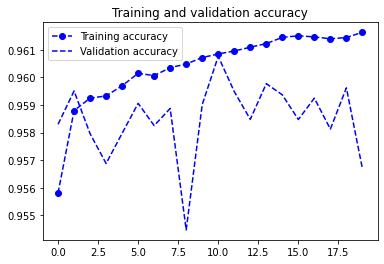

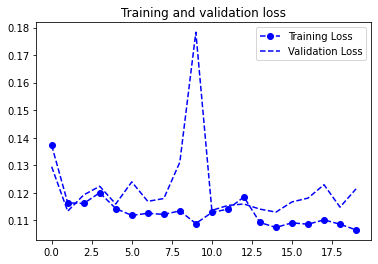

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy',linestyle='dashed')
# plt.plot(epochs, loss, 'b', label='Training Loss',linestyle='dashed')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',linestyle='dashed')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss',linestyle='dashed')
plt.plot(epochs, val_loss, 'b', label='Validation Loss',linestyle='dashed')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
print('val_acc',np.mean([v for v in history.history['val_accuracy']]))
print('trai', np.mean([v for v in history.history['accuracy']]))

val_acc 0.9585160046815873
trai 0.9603831917047501


prediction

In [0]:
import tensorflow as tf

In [0]:
model=tf.keras.models.load_model('D:\google drive\Missions\mission Retina\Do some code\model 2\model2nd11by11.hdf5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
chaseTest = []
chaseTestOutput = []
chaseTestOutput = np.load('D:/drive-Mission retina-dataset-model2data/chaseoutputvalidation.npy')
chaseTest = np.load('D:/drive-Mission retina-dataset-model2data/chasevalidation.npy')


In [0]:
chaseTest.shape

(192000,)

In [0]:
predict_chase=model.predict_classes(chaseTest)

In [0]:
predict_chase[400:500], c

In [0]:
stareTest = []
stareTestOutput = []
stareTest = np.load('D:/drive-Mission retina-dataset-model2data/starevalidation.npy')
stareTestOutput = np.load('D:/drive-Mission retina-dataset-model2data/stareoutputvalidation.npy')


In [0]:
stareTest.shape

(71136, 11, 11, 3)

In [0]:
driveTest = []
driveTestOutput = []
driveTest = np.load('D:/drive-Mission retina-dataset-model2data/drivevalidation.npy')
driveTestOutput = np.load('D:/drive-Mission retina-dataset-model2data/driveoutputvalidation.npy')

In [0]:
driveTest.shape

(184275, 11, 11, 3)

In [0]:
temp = np.concatenate((np.array(driveTest), np.array(stareTest)), axis = 0)
training_array_test = np.concatenate((temp, np.array(chaseTest)), axis = 0)


In [0]:
temp2 = []
temp2 = np.concatenate((np.array(driveTestOutput), np.array(stareTestOutput)), axis = 0)
training_array_test_output = np.concatenate((temp2, np.array(chaseTestOutput)), axis = 0)

In [0]:
indexes = random.sample(range(0, len(chaseTest)-1), k=500000)
chaseTest = []
# a = []
for i in indexes:
  # a.append(index)
  array = chaseTest[i]
  chaseTest.append(array)
# b = list(set(a))
indexesChaseTest = indexes
print(np.array(chaseTest).shape)

indexes = random.sample(range(0, len(driveTest)-1), k=500000)
driveTest = []
# a = []
for i in indexes:
  # a.append(index)
  array = driveTest[i]
  driveTest.append(array)
# b = list(set(a))
indexesDriveTest = indexes
print(np.array(driveTest).shape)

indexes = random.sample(range(0, len(stareTest)-1), k=500000)
stareTest = []
# a = []
for i in indexes:
  # a.append(index)
  array = stareTest[i]
  stareTest.append(array)
# b = list(set(a))
indexesStareTest = indexes
print(np.array(stareTest).shape)
# print(max(indexesStare), len(stareTrain))





ValueError: Sample larger than population or is negative

In [0]:
indexes = indexesChase
chaseOutput = []
# a = []
for i in indexes:
  # a.append(index)
  array = chaseTrainOutput[i]
  chaseOutput.append(array)
# b = list(set(a))
print(np.array(chaseOutput).shape)

indexes = indexesStare
StareOutput = []
# a = []
for i in indexes:
  # a.append(index)
  array = stareTrainOutput[i]
  StareOutput.append(array)
# b = list(set(a))
print(np.array(StareOutput).shape)

indexes = indexesDrive
DriveOutput = []
# a = []
for i in indexes:
  # a.append(index)
  array = driveTrainOutput[i]
  DriveOutput.append(array)
# b = list(set(a))
print(np.array(DriveOutput).shape)

